In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

# 1. SUMMARY STATISTICS

# a) Measures of central tendency

Statistics such as mean and median (mode in the case of catgorical data) help in summarizing all the data through a single central value.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.age.describe() 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

# b) Measures of dispersions

Range, interquartile range, variance, standard deviation, etc. help us understand the spread of the data or how the data varies from the central point.

In [8]:
#RANGE-the difference between the max and min value
range=max(df['charges'])-min(df['charges'])
range

62648.554110000005

In [9]:
#IQR-the spread of the middle 50% of values
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [10]:
#Standard Deviation-an average measure of spread i.e., variation from the mean(can be found in the result of describe func)
#Variance-the average of the squared distance from each point to the mean.
agestd=np.std(df.age)
agevar=np.var(df.age)
print(agestd)
print(agevar)

14.04470903895454
197.25385198889137


# c)Measure of shape/distribution

The shape of the data distribution can explain a great deal about the data as the shape can help in identifying the type of distribution followed by the data. 

In [11]:
#SKEWNESS
df.age.skew()

0.05567251565299186

In [12]:
#FREQUENCY DISTRIBUTION/FREQUENCY TABLES-useful for categorical columns
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
crosstab=pd.crosstab(index=df['children'], columns='count')
crosstab

col_0,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [16]:
#displaying the above frequencies as proportions
crosstabpro=crosstab/crosstab.sum()
crosstabpro

col_0,count
children,
0,0.428999
1,0.242152
2,0.179372
3,0.117339
4,0.018685
5,0.013453


# 2) VISUALIZATIONS

# Boxplots

Shows 5 number summary of the dataset i.e., minimum value, first quantile, median, third quantile, maximum value.
It helps visualize outliers.

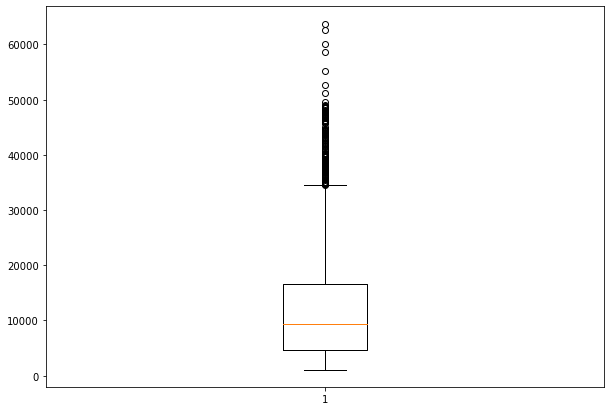

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['charges'])
plt.show()

<AxesSubplot:>

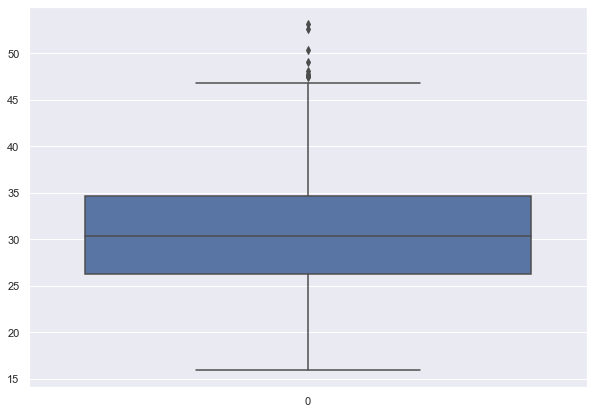

In [21]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.boxplot(data=df['bmi'])

# Violin Plot

Violin Plot is a combination of a box plot and density plot that shows the distribution shape of the data.

<AxesSubplot:>

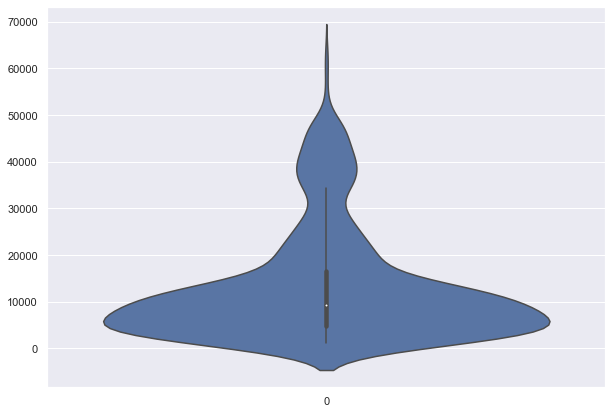

In [22]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.violinplot(data=df['charges'])

# Histogram

A histogram is a type of chart that uses vertical bars to display frequencies. This type of chart is a useful way to visualize the distribution of values in a dataset.

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

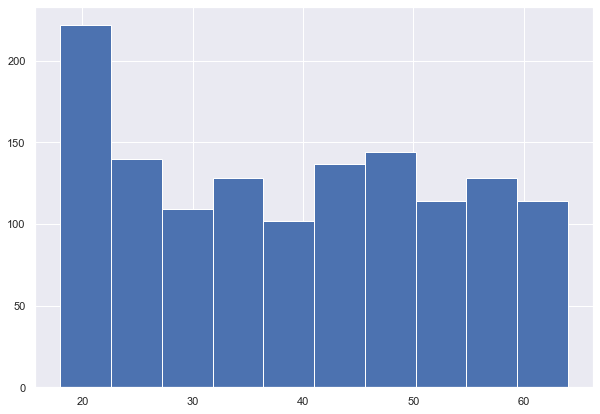

In [23]:
plt.hist(df['age'])

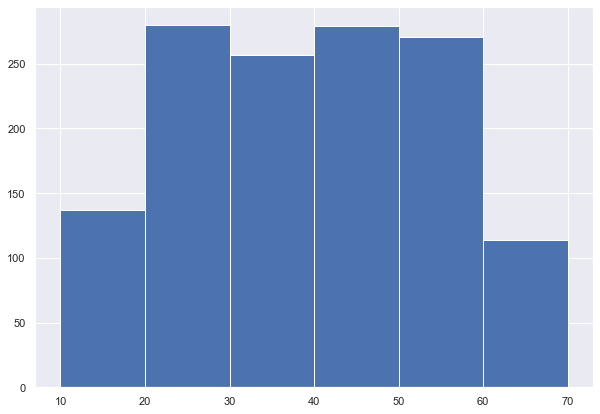

In [24]:
plt.hist(df['age'], bins=[10,20,30,40,50,60,70]) #custom bins based on the min and max values of age
plt.show()

# Density plots

A density plot is a representation of the distribution of a numeric variable. Also called Kernel density plot(hence kdeplot).

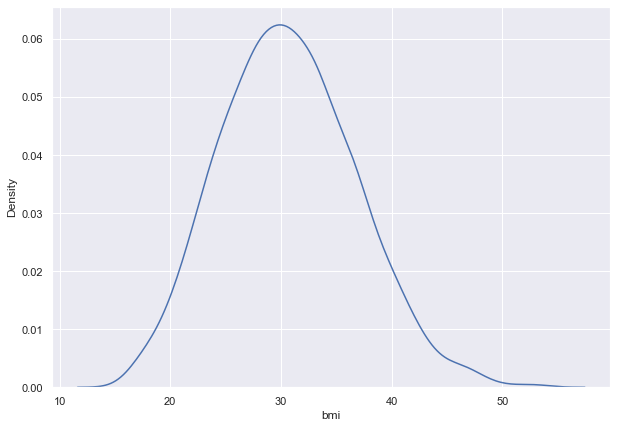

In [25]:
sns.kdeplot(df['bmi'])
plt.show()

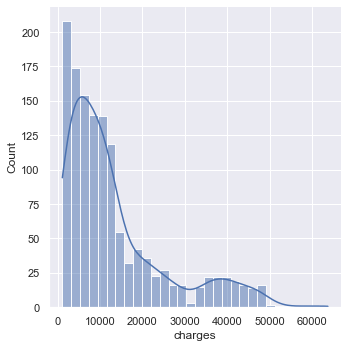

In [26]:
sns.displot(df['charges'],kde=True)

# Pie chart

Pie Chart is a graph that displays the data in a circular format. It is a type of pictorial representation of data that shows the relative sizes through the slices of pie.

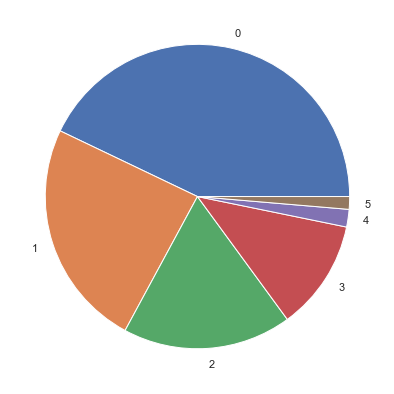

In [27]:
plt.pie(df['children'].value_counts(), labels=['0','1','2','3','4','5'])
plt.show()

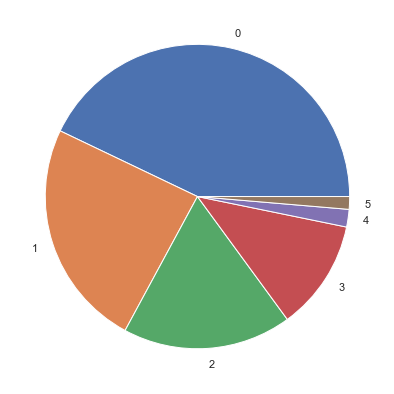

In [29]:
plt.pie(crosstabpro['count'],labels=['0','1','2','3','4','5']) #the crosstab formed with the proportions can also be used
plt.show()

In [33]:
!pip install plotly

In [34]:
import plotly.express as px

In [35]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [36]:
px.pie(values=df['region'].value_counts(), names=('southeast','southwest','northwest','northeast'))

# Countplot

Count plot helps us visualize the frequency of the categorical columns

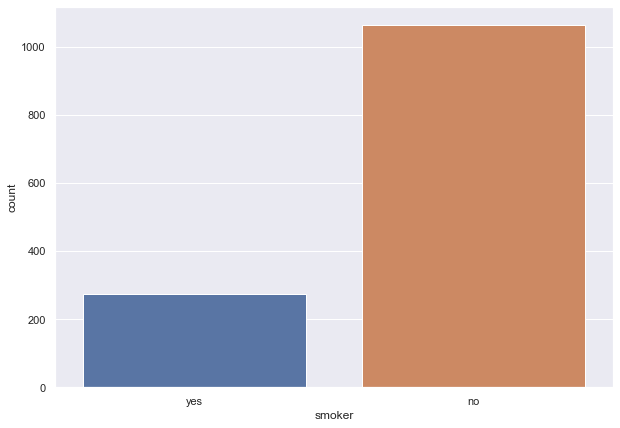

In [37]:
sns.countplot(x=df['smoker'])
plt.show()